#ANN

In [73]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [46]:
df = pd.read_csv('query (4).csv')
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-02-21T10:11:47.799Z,28.5633,87.5409,10.000,4.9,mb,68.0,67.0,2.137,0.97,...,2025-02-27T21:38:11.659Z,"98 km NE of Lobuche, Nepal",earthquake,7.89,1.862,0.054,107.0,reviewed,us,us
1,2025-02-20T06:02:58.563Z,25.7977,90.6738,10.000,4.3,mb,34.0,154.0,3.911,0.99,...,2025-03-08T12:23:12.040Z,"42 km S of Goālpāra, India",earthquake,7.77,1.852,0.106,25.0,reviewed,us,us
2,2025-02-17T00:06:52.349Z,28.5887,77.1025,10.000,4.2,mb,32.0,204.0,7.258,0.61,...,2025-03-11T22:13:27.498Z,"10 km SSE of Nāngloi Jāt, India",earthquake,7.96,1.946,0.128,17.0,reviewed,us,us
3,2025-02-16T03:28:58.344Z,29.0272,87.5405,10.000,4.8,mb,79.0,94.0,2.337,0.75,...,2025-03-07T02:46:18.532Z,"132 km W of Rikaze, China",earthquake,8.91,1.865,0.058,94.0,reviewed,us,us
4,2025-02-15T17:48:18.144Z,33.4067,73.0563,35.848,4.7,mb,139.0,42.0,3.441,0.64,...,2025-03-05T18:06:52.476Z,"21 km S of Rawalpindi, Pakistan",earthquake,8.23,4.417,0.046,149.0,reviewed,us,us


In [47]:
columns_to_drop = ['net','id','magType', 'nst', 'gap', 'dmin', 'rms', 'updated', 'place', 'type', 'horizontalError', 'depthError', 'magError', 'magNst', 'status', 'locationSource', 'magSource']
df = df.drop(columns = columns_to_drop)


In [48]:
df = df.dropna()

In [49]:
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year.astype('int16')
df['month'] = df['time'].dt.month.astype('int8')
df['Day'] = df['time'].dt.day.astype('int8')
df['hour'] = df['time'].dt.hour.astype('int8')
df = df.drop(columns = ['time'])

In [50]:
df.head()

,latitude,longitude,depth,mag,year,month,Day,hour
0,28.5633,87.5409,10.000,4.9,2025,2,21,10
1,25.7977,90.6738,10.000,4.3,2025,2,20,6
2,28.5887,77.1025,10.000,4.2,2025,2,17,0
3,29.0272,87.5405,10.000,4.8,2025,2,16,3
4,33.4067,73.0563,35.848,4.7,2025,2,15,17


In [51]:
#Optimize data
df['latitude'] = df['latitude'].astype('float32')
df['longitude'] = df ['longitude'].astype('float32')
df['depth'] = df['depth'].astype('float32')
df['mag'] = df['mag'].astype('float32')

In [53]:
print("Full DataFrame shape:", df.shape)
print("Columns in DataFrame:", df.columns.tolist())

Full DataFrame shape: (6940, 8)
Columns in DataFrame: ['latitude', 'longitude', 'depth', 'mag', 'year', 'month', 'Day', 'hour']


In [54]:
#setting features and target
features = df[[	'latitude', 'longitude','depth','mag','year','month','Day','hour']]
target = df['mag']

In [55]:
print("Features shape (raw):", features.shape)
print("Target shape (raw):", target.shape)

Features shape (raw): (6940, 8)
Target shape (raw): (6940,)


In [56]:
#scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [57]:
#test_train split
x_train, x_test, y_train, y_test = train_test_split(features_scaled, target, test_size = 0.2, random_state = 42)

Build ANN

In [58]:
model = Sequential()
model.add(Dense(64, input_dim = x_train.shape[1], activation = 'relu')) 
model.add(Dense(32, activation = 'relu'))
model.add (Dense(1, activation = 'linear'))
model.compile(loss = 'mean_squared_error', optimizer = 'Adam', metrics = ['mae'])

C:\Users\Guru G\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


train

In [59]:
history = model.fit(x_train, y_train, epochs = 50, batch_size = 128, validation_split = 0.2, verbose = 1)


Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 15.2507 - mae: 3.8100 - val_loss: 4.5055 - val_mae: 1.9457
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7045 - mae: 1.3973 - val_loss: 1.0406 - val_mae: 0.8160
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9531 - mae: 0.7813 - val_loss: 0.8163 - val_mae: 0.7248
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7589 - mae: 0.6948 - val_loss: 0.6813 - val_mae: 0.6573
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6464 - mae: 0.6384 - val_loss: 0.5955 - val_mae: 0.6098
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5477 - mae: 0.5896 - val_loss: 0.5288 - val_mae: 0.5756
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5108 - mae: 0.5653 - val_loss: 0.4710 - val_mae: 0.5415
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4298 - mae: 0.5207 - val_loss: 0.4241 - val_mae: 0.5129
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3965 - mae

Evaluate

In [60]:
loss,mae = model.evaluate(x_test, y_test, verbose = 0)
print(f'Test Mean Absolute Error: {mae:.2f}')

Test Mean Absolute Error: 0.05


In [61]:

model.compile(loss = 'Mean_squared_error', optimizer = Adam(learning_rate = 0.0001), metrics = ['mae'])

In [62]:
from tensorflow.keras.losses import MeanSquaredError
model.compile(loss=MeanSquaredError(), optimizer='adam', metrics=['mae'])

In [63]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scores = []
for train_idx, test_idx in kf.split(features_scaled):
    X_train, X_test = features_scaled[train_idx], features_scaled[test_idx]
    y_train, y_test = target.iloc[train_idx], target.iloc[test_idx]
    model.fit(X_train, y_train, epochs=50, batch_size=128, verbose=0)
    loss, mae = model.evaluate(X_test, y_test, verbose=0)
    mae_scores.append(mae)
print(f"Mean MAE across 5 folds: {np.mean(mae_scores):.2f}")

Mean MAE across 5 folds: 0.00


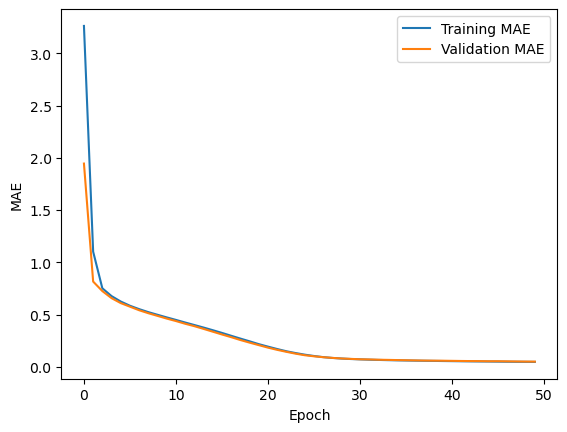

In [64]:
import matplotlib.pyplot as plt
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


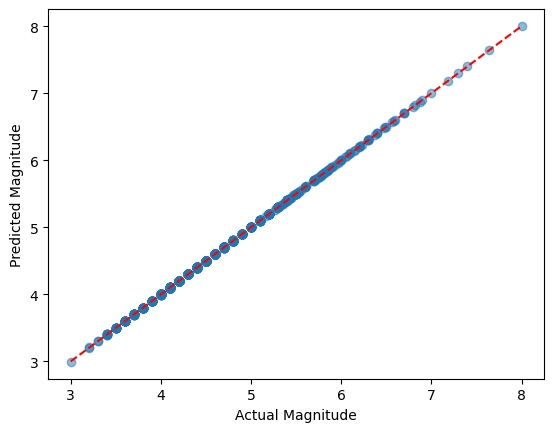

In [66]:
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.show()

In [65]:
from sklearn.inspection import permutation_importance
# Train a simpler model (e.g., Random Forest) for comparison
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor().fit(features_scaled, target)
result = permutation_importance(rf, features_scaled, target, n_repeats=10, random_state=42)
for i in result.importances_mean.argsort()[::-1]:
    print(f"{features.columns[i]}: {result.importances_mean[i]:.3f}")

mag: 1.997
longitude: 0.000
year: 0.000
latitude: 0.000
hour: 0.000
Day: 0.000
month: 0.000
depth: 0.000


In [67]:
model.save('earthquake_magnitude_model.h5')
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']